# Explorative Data Analysis - Patients

In this notebook you find the explorative data analysis for the data of patients.
There is also diagnostic data of the patients, data of the used MRI machines and there is also laboratory data available.


## Imports and Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set default plt figsize to (12,6)
plt.rcParams["figure.figsize"] = (12,6)
pd.set_option('display.colheader_justify', 'center')


In [2]:
# runs the clean and preprocessing notebook
%run "clean_preprocessing_dirty.ipynb"

In [3]:
# runs the data_partitioning notebook
%run "data_partitioning_dirty.ipynb"

Start Data Partitioning
Total Patients Train set: 328
Total Patients Test set: 37
Label Distribution relative Difference between Train- and Testset:
 ± 0.89 %
Total Dataframe Train rows: 744
Total Dataframe Test rows: 95
Label Distribution relative Difference between Train- and Testset:
 ± 0.15 %
Total Dataframe Fold 1 rows: 149
Total Dataframe Fold 2 rows: 149
Total Dataframe Fold 3 rows: 149
Total Dataframe Fold 4 rows: 149
Total Dataframe Fold 5 rows: 148
Label Distribution relative Difference between Fold 0 vs. Fold 1:
 ± 0.0 %
Label Distribution relative Difference between Fold 0 vs. Fold 2:
 ± 0.0 %
Label Distribution relative Difference between Fold 0 vs. Fold 3:
 ± 0.013 %
Label Distribution relative Difference between Fold 0 vs. Fold 4:
 ± 0.004 %
Label Distribution relative Difference between Fold 1 vs. Fold 2:
 ± 0.0 %
Label Distribution relative Difference between Fold 1 vs. Fold 3:
 ± 0.013 %
Label Distribution relative Difference between Fold 1 vs. Fold 4:
 ± 0.004 %
Labe

In [4]:
# runs the imputation notebook
%run "imputation_dirty.ipynb"

Start Imputation Lab data
Sparsity of lab values of trainset before imputation, in percent is:
Datum_Resultat    48.118280
COR               70.564516
FSH               69.086022
FT4               60.215054
IGF1              64.112903
LH                68.145161
PROL              55.107527
dtype: float64
Sparsity of lab values of testset before imputation, in percent is:
Datum_Resultat    43.157895
COR               74.736842
FSH               69.473684
FT4               54.736842
IGF1              64.210526
LH                74.736842
PROL              53.684211
dtype: float64
Sparsity of lab values in trainset after imputation, in percent is:
Datum_Resultat    48.11828
COR                0.00000
FSH                0.00000
FT4                0.00000
IGF1               0.00000
LH                 0.00000
PROL               0.00000
dtype: float64
Sparsity of lab values in testset after imputation, in percent is:
Datum_Resultat    43.157895
COR                0.000000
FSH                0

In [5]:
# read train data set
df = pd.read_csv(r'../data/train_data_dirty.csv')

In [6]:
# set category data type in pandas, check datatypes
df['Category'] = df['Category'].astype('category')
df['Patient_gender'] = df['Patient_gender'].astype('category')

## Dataframe Summary

In [7]:
df.head()

,Patient_ID,Category,Case_ID,Datum_Resultat,COR,FSH,FT4,IGF1,LH,PROL,TEST,Date_Case,MRI_Case_ID,Patient_age,Patient_gender,Pre_OP_hormone_thyreo,Pre_OP_hormone_gonado,Pre_OP_hormone_somato,Pre_OP_hormone_hyperprolaktin,fold
0,300101347,non-prolaktinom,40536446,2018-07-19,368.7775,5.65,13.90000,19.500,6.10,16.70,1.00,NaN,NaN,40,female,0,0,0,0,1
1,300101347,non-prolaktinom,41147095,2021-05-05,397.5000,5.65,15.10000,27.400,6.10,36.80,1.00,NaN,NaN,40,female,0,0,0,0,3
2,300101347,non-prolaktinom,41507635,2023-03-03,550.0000,0.95,17.40000,25.400,2.62,8.44,1.00,NaN,NaN,40,female,0,0,0,0,2
3,300101347,non-prolaktinom,41147095,NaN,550.0000,5.65,15.70262,22.401,6.10,260.50,1.00,2021-03-08 14:50:00,7896469.0,40,female,0,0,0,0,3
4,300109121,non-prolaktinom,40689394,2019-04-01,626.5000,2.00,12.00000,6.010,0.60,8.90,2.94,NaN,NaN,73,male,0,1,1,0,1


In [8]:
df.tail()

,Patient_ID,Category,Case_ID,Datum_Resultat,COR,FSH,FT4,IGF1,LH,PROL,TEST,Date_Case,MRI_Case_ID,Patient_age,Patient_gender,Pre_OP_hormone_thyreo,Pre_OP_hormone_gonado,Pre_OP_hormone_somato,Pre_OP_hormone_hyperprolaktin,fold
739,300089791,non-prolaktinom,40435452,2018-01-30,304.6495,7.10,8.1700,10.800,0.7,19.9,0.75,NaN,NaN,69,male,1,1,0,0,0
740,300089791,non-prolaktinom,40444422,2018-03-01,522.0000,4.60,15.4452,16.768,2.3,227.9,9.02,NaN,NaN,69,male,1,1,0,0,3
741,80696,non-prolaktinom,41202474,2021-05-26,463.0000,3.80,10.8000,8.900,2.3,16.2,5.04,NaN,NaN,79,male,0,0,0,0,3
742,80696,non-prolaktinom,41254265,2021-06-30,53.0000,5.59,7.1200,14.279,3.2,250.3,13.40,NaN,NaN,79,male,0,0,0,0,3
743,80696,non-prolaktinom,41132330,NaN,550.0000,5.59,15.4452,14.279,3.2,250.3,13.40,2021-04-01 09:12:00,8372415.0,79,male,0,0,0,0,4


In [9]:
print("Total Dataframe rows:", len(df))
print("Total Dataframe columns:", len(df.columns))
label_col = 'Category'
non_prol_n = len(df[df[label_col] == 'non-prolaktinom'])
prol_n = len(df[df[label_col] == 'prolaktinom'])
print("Dataframe rows with prolatinom label:", prol_n)
print("Dataframe rows with non-prolatinom label:", non_prol_n)

Total Dataframe rows: 744
Total Dataframe columns: 20
Dataframe rows with prolatinom label: 226
Dataframe rows with non-prolatinom label: 518


## Distribution Analysis
we will take a look at the distributions of the variables and check for outliers as well.

#### Prolactin (hormone)
The Column 'Prolactin' contains the measured values of prolactin for the patient.


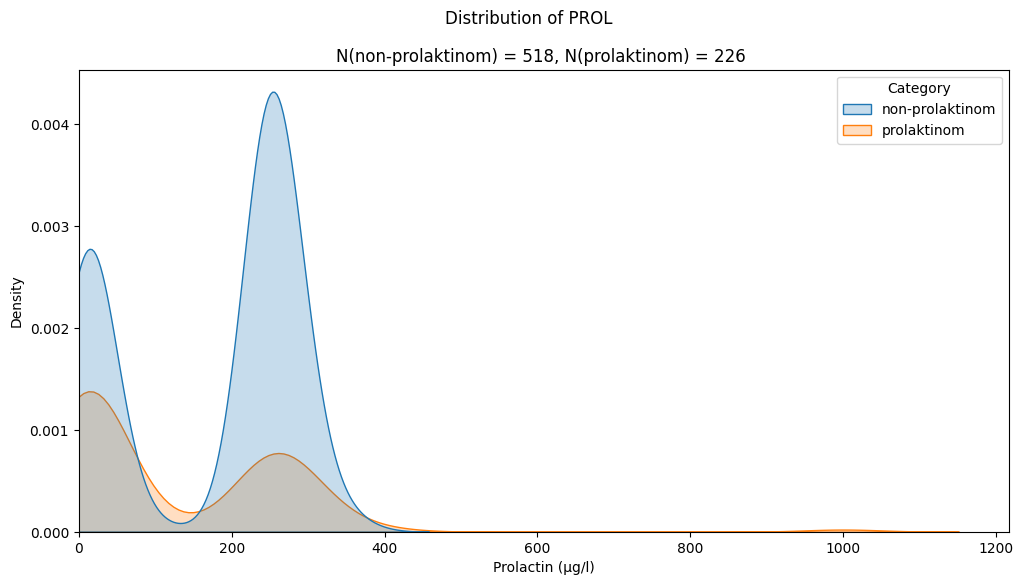

In [10]:
column = 'PROL'
sns.kdeplot(df,x=column,hue=label_col,fill=True,)
plt.title(f"N(non-prolaktinom) = {non_prol_n}, N(prolaktinom) = {prol_n} ")
plt.suptitle(f'Distribution of {column}')
plt.xlabel('Prolactin (μg/l)')
plt.xlim(0, None)
plt.show()

#### Cortisol
The Column 'COR' contains the measured values of Cortisol for the patient.


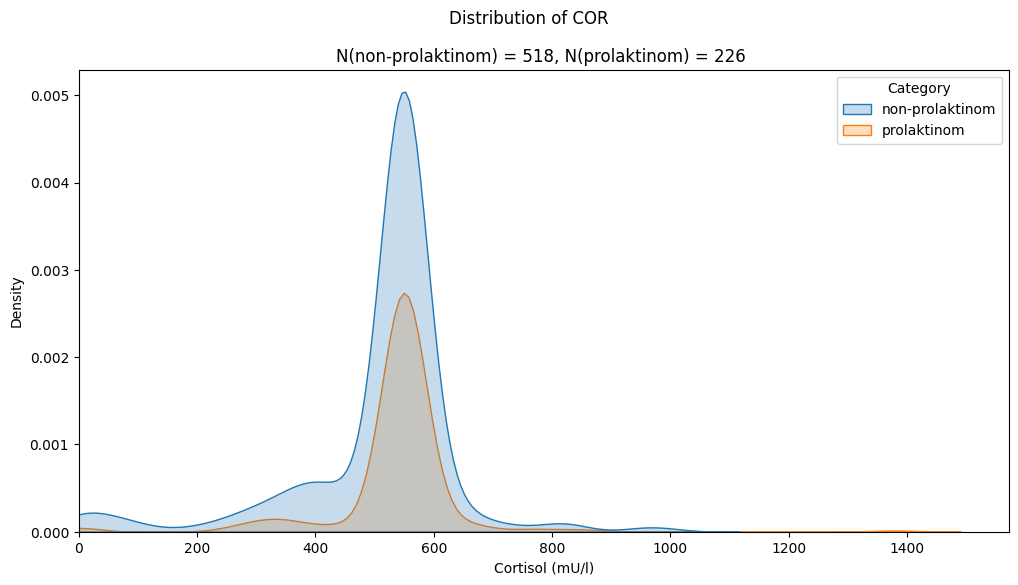

In [11]:
column = 'COR'
sns.kdeplot(df,x=column,hue=label_col,fill=True,)
plt.title(f"N(non-prolaktinom) = {non_prol_n}, N(prolaktinom) = {prol_n} ")
plt.suptitle(f'Distribution of {column}')
plt.xlabel('Cortisol (mU/l)')
plt.xlim(0, None)
plt.show()

#### IGF1 (hormone)
The Column 'IGF1' contains the measured values of Insulin-like growth factor 1 for the patient.


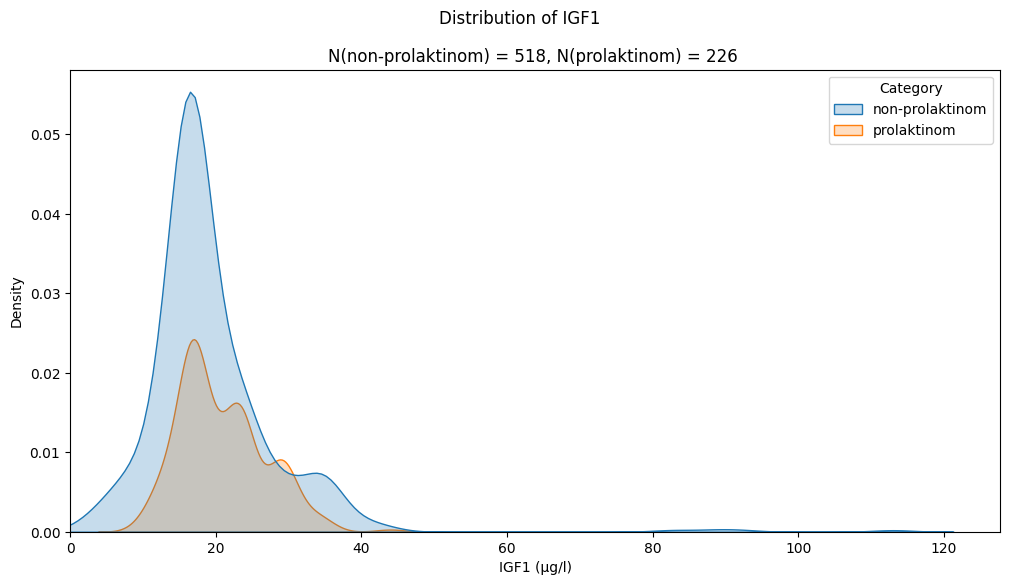

In [12]:
column = 'IGF1'
sns.kdeplot(df,x=column,hue=label_col,fill=True,)
plt.title(f"N(non-prolaktinom) = {non_prol_n}, N(prolaktinom) = {prol_n} ")
plt.suptitle(f'Distribution of {column}')
plt.xlabel('IGF1 (μg/l)')
plt.xlim(0, None)
plt.show()

#### FT4 (hormone)
The Column 'FT4' contains the measured values of Thyroxine free hormone for the patient.


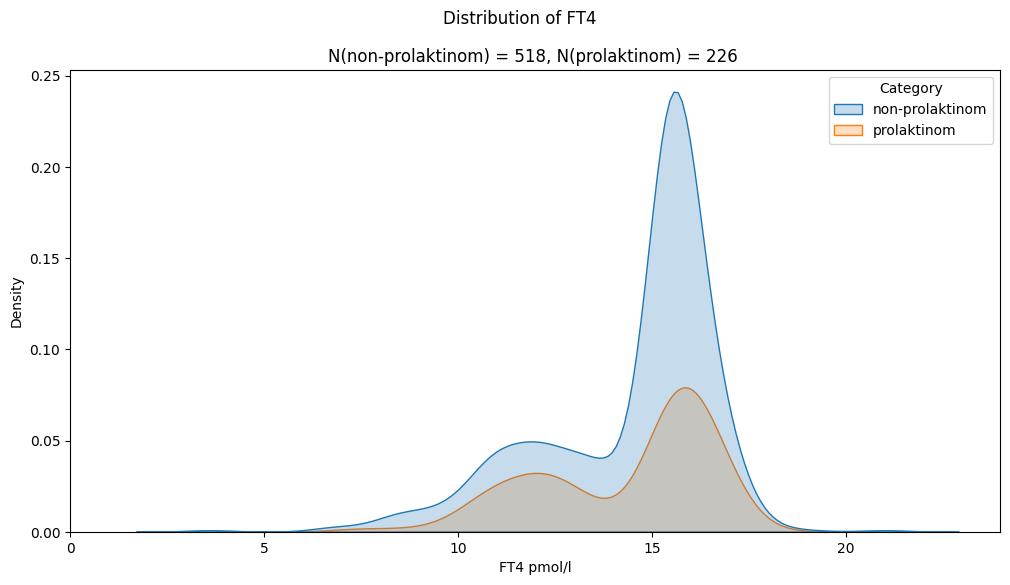

In [13]:
column = 'FT4'
sns.kdeplot(df,x=column,hue=label_col,fill=True,)
plt.title(f"N(non-prolaktinom) = {non_prol_n}, N(prolaktinom) = {prol_n} ")
plt.suptitle(f'Distribution of {column}')
plt.xlabel('FT4 pmol/l')
plt.xlim(0, None)
plt.show()


#### Testosteron (hormone)
The Column 'Testosteron' contains the measured values of Testosteron for the patient.


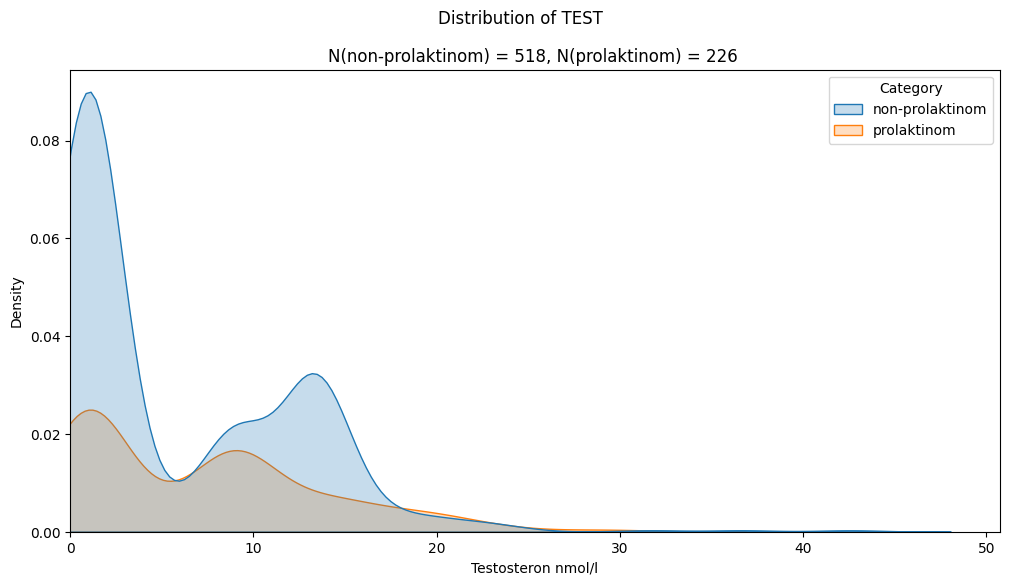

In [14]:
column = 'TEST'
sns.kdeplot(df,x=column,hue=label_col,fill=True,)
plt.title(f"N(non-prolaktinom) = {non_prol_n}, N(prolaktinom) = {prol_n} ")
plt.suptitle(f'Distribution of {column}')
plt.xlabel('Testosteron nmol/l')
plt.xlim(0, None)
plt.show()

#### LH (hormone)
The Column 'LH' contains the measured values of Luteinizing Hormone for the patient.


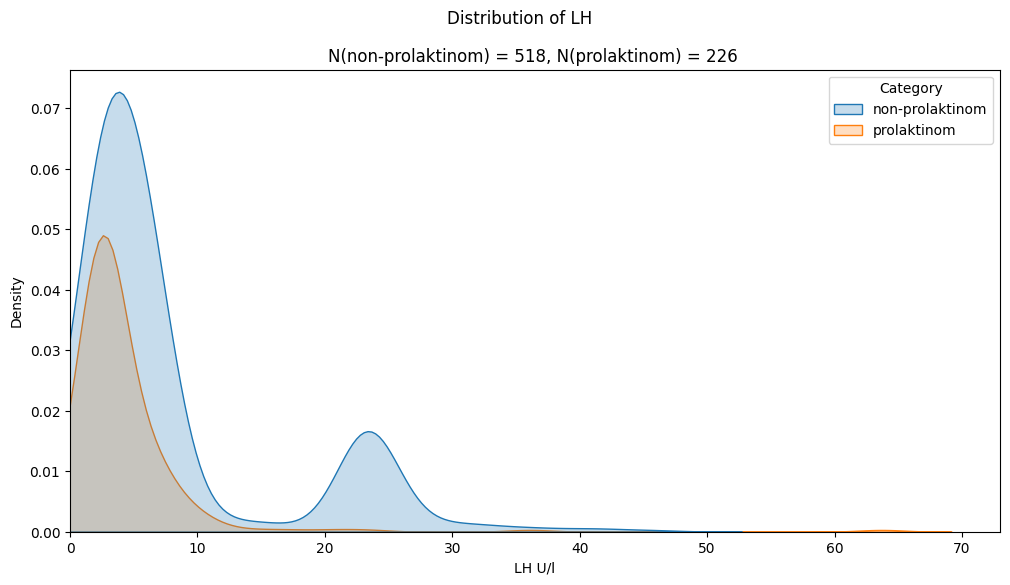

In [15]:
column = 'LH'
sns.kdeplot(df,x=column,hue=label_col,fill=True,)
plt.title(f"N(non-prolaktinom) = {non_prol_n}, N(prolaktinom) = {prol_n} ")
plt.suptitle(f'Distribution of {column}')
plt.xlabel('LH U/l')
plt.xlim(0, None)
plt.show()

#### FSH (hormone)
The Column 'FSH' contains the measured values of Follicle-stimulating hormone  for the patient.


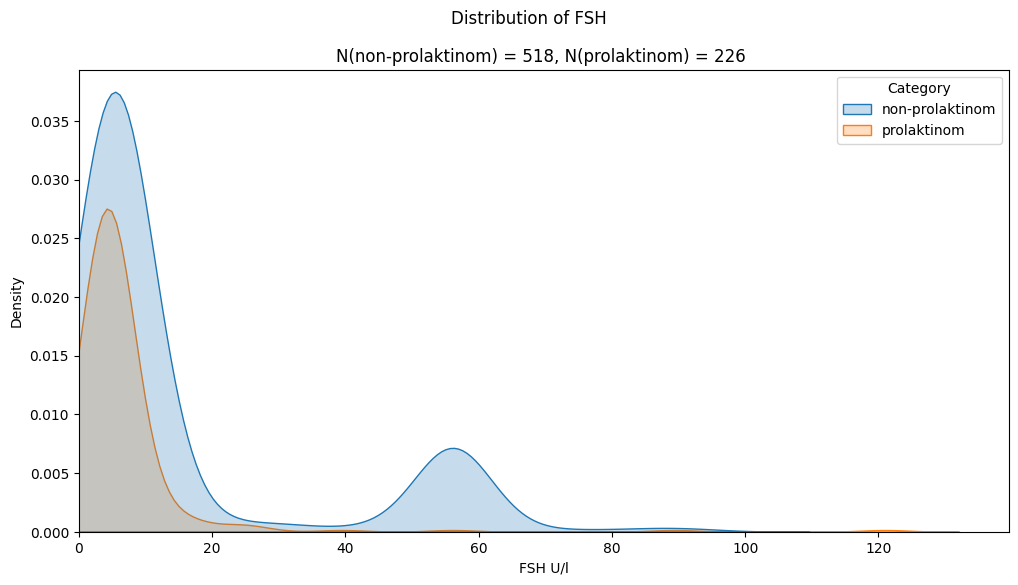

In [16]:
column = 'FSH'
sns.kdeplot(df,x=column,hue=label_col,fill=True,)
plt.title(f"N(non-prolaktinom) = {non_prol_n}, N(prolaktinom) = {prol_n} ")
plt.suptitle(f'Distribution of {column}')
plt.xlabel('FSH U/l')
plt.xlim(0, None)
plt.show()